# Этап 01 Анализ данных

In [1]:
# !pip install pysxgeo
# !pip install scikit-learn
# !pip install transformers
# !pip install fastapi
# !pip install pydantic
# !pip install "uvicorn[standard]"

In [2]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from tqdm.auto import tqdm

/home/joefox/.pyvenv/base/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tqdm.pandas()

In [4]:
from src.preprocess import TrafficPreprocess

In [5]:
traffic_preprocess = TrafficPreprocess()

In [6]:
df = pd.read_csv('data/part_10.csv.gz',compression='gzip')

In [7]:
df = df[:1000]

In [8]:
df

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
0,188.138.92.55,NaN,166,404,REQUEST_URI,NaN,//tmp/20160925122692indo.php.vob,AVdhXFgVq1Ppo9zF5Fxu
1,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,AVdcJmIIq1Ppo9zF2YIp
2,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",iz7SN2YBrgKk_RFNZW_U
3,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,AVdjekw4q1Ppo9zF6QT2
4,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,SqQGI2QB5cBXmMW1CDbp
...,...,...,...,...,...,...,...,...
995,37.46.129.136,User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW6...,772,200,REQUEST_POST_ARGS,REQUEST_POST_ARGS.rid,3553370207,yY4nIWQB5cBXmMW1dQxC
996,83.220.239.206,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like M...,966,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516232259174,zYwHIWQB5cBXmMW1Fob5
997,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,3006,200,RESPONSE_HEADERS,RESPONSE_HEADERS.AN-X-Request-Uuid,4b8666d5-746b-4b35-a70b-b0a9b9febcd0,VHhkH2QB5cBXmMW1Z29a
998,217.175.155.56,Mozilla/5.0 (iPad; CPU OS 11_2_2 like Mac OS X...,529,304,REQUEST_HEADERS,REQUEST_HEADERS.If-None-Match,"\""5a64b7a5-3bbc\""",9nmGH2QB5cBXmMW1KfMS


## Описание состава колонок

**CLIENT_IP**: IP-адрес клиента, отправившего запрос к серверу. Это значение указывает на источник запросов и может использоваться для идентификации клиентов.

**CLIENT_USERAGENT**: Значение User-Agent, содержащееся в заголовке запроса клиента. User-Agent обычно содержит информацию о операционной системе и используемом браузере клиента.

**REQUEST_SIZE**: Размер запроса клиента в байтах. Это значение указывает на объем данных, отправленных клиентом, и может использоваться для анализа нагрузки на сервер.

**RESPONSE_CODE**: Код ответа сервера на запрос клиента. Это значение позволяет определить статус выполнения запроса и может содержать информацию о возникших ошибках или успешном выполнении.

**MATCHED_VARIABLE_SRC**: Название источника переменной, которая была найдена или сопоставлена с запросом клиента. Это значение указывает на контекст или систему, в которой переменная была обнаружена. 

Например, это может быть название системы или компонента, которые обрабатывают запросы клиентов и находят или сопоставляют переменные.

**MATCHED_VARIABLE_NAME**: Название найденной переменной. Переменная обычно представляет собой часть URL-адреса или содержимое запроса и может содержать информацию о параметрах запроса или пользовательских данных.

Например, это может быть название параметра в URL-адресе или название параметра в теле запроса. Это помогает понять, какие параметры запроса были переданы клиентом.

**MATCHED_VARIABLE_VALUE**: Значение найденной переменной. Это значение представляет собой конкретное значение переменной, найденной в запросе клиента.

Это помогает понять, какие значения были переданы в переменных запроса. Например, вы можете использовать эту информацию для анализа пользовательских данных или параметров запроса.

**EVENT_ID**: Уникальный идентификатор события или записи в таблице. Это значение используется для идентификации записи и может использоваться для анализа и ретроспективного поиска определенных событий.

In [9]:
df.columns

Index(['CLIENT_IP', 'CLIENT_USERAGENT', 'REQUEST_SIZE', 'RESPONSE_CODE',
       'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME',
       'MATCHED_VARIABLE_VALUE', 'EVENT_ID'],
      dtype='object')

In [10]:
#Если предположить, что EVENT_ID - это уникальный идентификатор, то не очень понятно почему есть дублирующие записи в поле EVENT_ID
df[df.duplicated(subset='EVENT_ID')].sort_values('EVENT_ID')

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,EVENT_ID
850,202.182.253.109,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1362,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,287295176,ZaUpI2QB5cBXmMW1BNfF
162,Remote Code Execution,AVdtgf8uq1Ppo9zF_hyd,4df2f46285c84ba39fa84fc4878214ae,NaN,NaN,NaN,NaN,NaN


In [11]:
#Поле EVENT_ID кажется не информативным и ненужным, удалим его
df.drop('EVENT_ID',inplace=True,axis=1)

## Нормализация IP адресов

In [12]:
#Найдем, есть ли записи с плохим IP адресом
pattern =  r'(\b(?:\d{1,3}\.){3}\d{1,3}\b)'
df['RIGHT_CLIENT_IP'] = df['CLIENT_IP'].str.extract(pattern)
df[df['RIGHT_CLIENT_IP'] != df['CLIENT_IP']]

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,RIGHT_CLIENT_IP
50,"> -gOxT""O<Ghèe]Ø È8 G`Qf¾ñ }y ðù!T...",SQL Injection,AVdYz8-Wq1Ppo9zF0mzK,2f53b17df6da6bf9aeec27b0d87413c4,NaN,NaN,NaN,NaN
162,Remote Code Execution,AVdtgf8uq1Ppo9zF_hyd,4df2f46285c84ba39fa84fc4878214ae,NaN,NaN,NaN,NaN,NaN
311,2001:4ba0:cafe:ace::1,Mozilla/5.0 (Windows; U; Windows NT 5.1; pt-PT...,920,200,REQUEST_GET_ARGS,id,"999999.9 /**/uNiOn/**/aLl /**/sElEcT 1,2,(/**/...",NaN
590,2a01:598:9902:df0c:8115:691e:c38,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...,1272,304,REQUEST_COOKIES,nf_wp_session,db512c7a8912e4a4b7ac84d39ec5a7a1||1474648967||...,NaN
649,2a01:4f8:171:3299::2,Mozilla/5.0 (X11; U; Linux i686; ru; rv:1.9.0....,705,200,REQUEST_ARGS,url,http://www.fpa.org/.../International%20Affairs...,NaN
864,2a02:750:5::9c5,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,423,302,REQUEST_GET_ARGS,product_id,857 AND 1=1,NaN
967,2a02:27aa::68b,Mozilla/5.0 (Windows NT 10.0; rv:49.0) Gecko/2...,678,200,REQUEST_ARGS,file,../../../images/stories/foto/object16/photo-22...,NaN


In [13]:
#Получается в качестве IP адреса может быть адреc IPv4 или IPv6, добавим поиск IPv6
pattern = r'(\b(?:(?:\d{1,3}\.){3}\d{1,3}|(?:[A-Fa-f0-9]{1,4}:){7}[A-Fa-f0-9]{1,4}|(?:[A-Fa-f0-9]{1,4}:){1,6}:[A-Fa-f0-9]{1,4})\b)'
df['RIGHT_CLIENT_IP'] = df['CLIENT_IP'].str.extract(pattern)
df[df['RIGHT_CLIENT_IP'] != df['CLIENT_IP']]

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,RIGHT_CLIENT_IP
50,"> -gOxT""O<Ghèe]Ø È8 G`Qf¾ñ }y ðù!T...",SQL Injection,AVdYz8-Wq1Ppo9zF0mzK,2f53b17df6da6bf9aeec27b0d87413c4,NaN,NaN,NaN,NaN
162,Remote Code Execution,AVdtgf8uq1Ppo9zF_hyd,4df2f46285c84ba39fa84fc4878214ae,NaN,NaN,NaN,NaN,NaN
590,2a01:598:9902:df0c:8115:691e:c38,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...,1272,304,REQUEST_COOKIES,nf_wp_session,db512c7a8912e4a4b7ac84d39ec5a7a1||1474648967||...,NaN


In [14]:
#Тестируем функцию из модуля препроцессинга, результаты должны быть аналогичные
df['RIGHT_CLIENT_IP'] = df['CLIENT_IP'].apply(lambda x: traffic_preprocess.check_right_ip(x))
df[df['RIGHT_CLIENT_IP'] != df['CLIENT_IP']]

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,RIGHT_CLIENT_IP
50,"> -gOxT""O<Ghèe]Ø È8 G`Qf¾ñ }y ðù!T...",SQL Injection,AVdYz8-Wq1Ppo9zF0mzK,2f53b17df6da6bf9aeec27b0d87413c4,NaN,NaN,NaN,None
162,Remote Code Execution,AVdtgf8uq1Ppo9zF_hyd,4df2f46285c84ba39fa84fc4878214ae,NaN,NaN,NaN,NaN,None
590,2a01:598:9902:df0c:8115:691e:c38,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...,1272,304,REQUEST_COOKIES,nf_wp_session,db512c7a8912e4a4b7ac84d39ec5a7a1||1474648967||...,None


In [15]:
#По всей видимости полученный 151 строка адресов являются ошибочными данными, удалим их
df = df[df['RIGHT_CLIENT_IP'] == df['CLIENT_IP']]
df.drop(['RIGHT_CLIENT_IP'],axis=1,inplace=True)

/tmp/ipykernel_7559/4137580977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['RIGHT_CLIENT_IP'],axis=1,inplace=True)


## Заполним страну по IP адресу

In [16]:
df['preproc_CLIENT_IP_country'] = df['CLIENT_IP'].apply(lambda x: traffic_preprocess.get_country(x))

/tmp/ipykernel_7559/1410707229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preproc_CLIENT_IP_country'] = df['CLIENT_IP'].apply(lambda x: traffic_preprocess.get_country(x))


In [17]:
df[['CLIENT_IP','preproc_CLIENT_IP_country']]

,CLIENT_IP,preproc_CLIENT_IP_country
0,188.138.92.55,DE
1,93.158.215.131,NL
2,176.123.240.64,KG
3,73.78.81.63,US
4,66.102.9.44,US
...,...,...
995,37.46.129.136,RU
996,83.220.239.206,RU
997,217.175.140.69,RU
998,217.175.155.56,RU


## Нормализация CLIENT_USERAGENT

In [18]:
#Достаточно обширное разнообраией значений UserAgent давайте нормализуем и преобразуем в TFIDF вектора 
df['CLIENT_USERAGENT'].value_counts()

CLIENT_USERAGENT
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                                                                 44
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36                                                   36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36                                                  36
Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)                                                                                                     21
Mozilla/5.0 (compatible; AhrefsBot/5.2; +http://ahrefs.com/robot/)                                                                                                   21
                                                                                                                                               

In [19]:
# str_regex = r'\b[а-яА-Яa-zA-Z]+\b'
# df['CLIENT_USERAGENT_preproc'] = df['CLIENT_USERAGENT'].apply(lambda x: ' '.join(re.findall(str_regex, str(x).lower())))
# df['CLIENT_USERAGENT_preproc']

In [20]:
df['preproc_CLIENT_USERAGENT'] = df['CLIENT_USERAGENT'].apply(lambda x: traffic_preprocess.agent_str_preproc(x))

/tmp/ipykernel_7559/3502794480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preproc_CLIENT_USERAGENT'] = df['CLIENT_USERAGENT'].apply(lambda x: traffic_preprocess.agent_str_preproc(x))


## Метод локтя для определния кластеров CLIENT_USERAGEN

In [21]:
str_regex = r'\b[а-яА-Яa-zA-Z]+\b'
agent_vectorizer = text.TfidfVectorizer(tokenizer=lambda text: re.findall(str_regex, text),min_df=2)

In [22]:
agent_vectors = agent_vectorizer.fit_transform(df['preproc_CLIENT_USERAGENT'])
agent_vectors

/home/joefox/.pyvenv/base/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<997x162 sparse matrix of type '<class 'numpy.float64'>'
	with 8531 stored elements in Compressed Sparse Row format>

In [23]:
def calculate_sse(data, k):
    '''
    # Функция для вычисления SSE (сумма квадратов ошибок) для заданного количества кластеров
    '''
    kmeans = cluster.KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    return kmeans.inertia_

In [24]:
# %%time
# # Диапазон значений количества кластеров для проверки
# k_values = range(1, 100,2)

# # Вычисляем SSE для каждого значения количества кластеров
# sse_values = [calculate_sse(agent_vectors, k) for k in k_values]

# # Визуализация значения SSE в зависимости от количества кластеров
# plt.plot(k_values, sse_values)
# plt.xlabel('Number of clusters')
# plt.ylabel('SSE')
# plt.show()

### Методом локтя количество классов не выделяется, попробуем визуализировать
![Кластеризация](images/agent_clustrs_2023-09-09_15-14.png)

In [25]:
df.reset_index(drop=True,inplace=True)

In [26]:
#Чтобы не делать большое количество классов, решил сделать 20 классов агентов, смотреть в модуле constants.py
traffic_preprocess.agent_model_fit(df['preproc_CLIENT_USERAGENT'].values)

/home/joefox/.pyvenv/base/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
#Добавим номер кластера агента и вектор агента для визуализации
list_dict = []
list_vectors = []
for x in df['preproc_CLIENT_USERAGENT']:
    result = traffic_preprocess.agent_model_predict(x)
    vector = result.pop('agent_vector')
    list_vectors.append(vector.todense()[0])
    result['agent_cluster'] = result['agent_cluster']
    list_dict.append(result)
df_add = pd.DataFrame(list_dict)
df = pd.concat([df,df_add],axis=1)
list_vectors = np.asarray(list_vectors)
list_vectors = list_vectors.reshape(list_vectors.shape[0],list_vectors.shape[2])

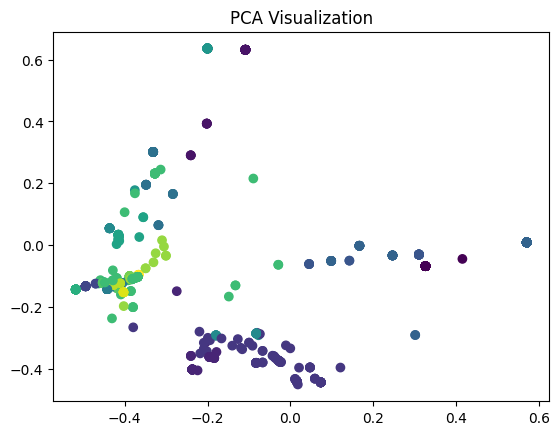

In [28]:
# Визуализируем кластеры используя метод PCA (главный компонент)
pca = decomposition.PCA(n_components=2)
pca_vectors = pca.fit_transform(list_vectors)

plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], c=df['agent_cluster'])
plt.title('PCA Visualization')
plt.show()

In [29]:
traffic_preprocess.agent_model_save()

In [30]:
df.drop(['preproc_CLIENT_USERAGENT'],axis=1,inplace=True)

In [31]:
df

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,preproc_CLIENT_IP_country,agent_cluster
0,188.138.92.55,NaN,166,404,REQUEST_URI,NaN,//tmp/20160925122692indo.php.vob,DE,13
1,93.158.215.131,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,431,302,REQUEST_GET_ARGS,url,http://www.galitsios.gr/?option=com_k2,NL,10
2,176.123.240.64,Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20...,395,403,REQUEST_PATH,NaN,"/opinion/page1_3.php\"" and \""\""x\""\""=\""\""x\""",KG,10
3,73.78.81.63,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:45.0) G...,387,302,REQUEST_GET_ARGS,url,http://thereviewgroup.org/boss-capital/,US,10
4,66.102.9.44,Mozilla/5.0 (Linux; Android 4.4.2; GT-N7100 Bu...,1733,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516288084140,US,3
...,...,...,...,...,...,...,...,...,...
992,37.46.129.136,User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW6...,772,200,REQUEST_POST_ARGS,REQUEST_POST_ARGS.rid,3553370207,RU,6
993,83.220.239.206,Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like M...,966,404,REQUEST_GET_ARGS,REQUEST_GET_ARGS._,1516232259174,RU,2
994,217.175.140.69,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,3006,200,RESPONSE_HEADERS,RESPONSE_HEADERS.AN-X-Request-Uuid,4b8666d5-746b-4b35-a70b-b0a9b9febcd0,RU,1
995,217.175.155.56,Mozilla/5.0 (iPad; CPU OS 11_2_2 like Mac OS X...,529,304,REQUEST_HEADERS,REQUEST_HEADERS.If-None-Match,"\""5a64b7a5-3bbc\""",RU,2


In [32]:
#Можно посмотреть представителей каждого кластера
agent_cluster = 0
df[df['agent_cluster'] == agent_cluster]['CLIENT_USERAGENT']

24     Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
36     Mozilla/5.0 (Windows NT 6.3) AppleWebKit/537.3...
38     Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...
47     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
57     Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
                             ...                        
905    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
912    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
921    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
935    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
957    Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
Name: CLIENT_USERAGENT, Length: 61, dtype: object

In [33]:
########## ДОБАВИТЬ ВИЗУАЛИЗАЦИЮ КЛАСТЕРОВ ПО ПЕРВЫМ 3м самым частотным словам

## Проанализируем значение колонки MATCHED_VARIABLE_SRC

In [34]:
#По анализу присутствуют запросы с ошибкой, создадим отдельный признак классификатор на запрос с ошибкой
valid_MATCHED_VARIABLE_SRC = ['REQUEST_GET_ARGS','REQUEST_COOKIES','REQUEST_HEADERS','REQUEST_PATH','REQUEST_ARGS','RESPONSE_HEADERS','REQUEST_POST_ARGS','REQUEST_URI','REQUEST_XML','REQUEST_ARGS_KEYS','REQUEST_JSON','CLIENT_USERAGENT','CLIENT_SESSION_ID','REQUEST_QUERY','RESPONSE_BODY','REQUEST_CONTENT_TYPE','REQUEST_FILES','CLIENT_IP']
df['preproc_MATCHED_VARIABLE_SRC_valid'] = df['MATCHED_VARIABLE_SRC'].apply(lambda x: traffic_preprocess.check_valid_matched_variable_src(x))

REQUEST_GET_ARGS: Этот запрос представляет аргументы GET-запроса, которые передаются в URL после знака вопроса (?). Они могут содержать параметры запроса, которые используются для передачи информации на сервер.

REQUEST_COOKIES: Этот запрос представляет куки (cookies), которые являются небольшими данными, хранимыми на компьютере пользователя, и отправляются на сервер в каждом запросе. Куки могут использоваться для сохранения информации о состоянии сеанса пользователя или для предоставления персонализированного контента.

REQUEST_HEADERS: Этот запрос содержит заголовки (headers) HTTP-запроса, которые могут содержать информацию о браузере, языке, сеансе пользователя и других параметрах запроса.

REQUEST_PATH: Этот запрос представляет путь (path) URL-адреса, который указывает на конкретный ресурс на сервере. Например, в URL "http://www.example.com/page1" путь "/page1" указывает на страницу "page1".

REQUEST_ARGS: Этот запрос представляет аргументы запроса, которые передаются в URL в виде данных после знака вопроса (?). Они могут содержать параметры запроса и их значения, которые используются для передачи информации на сервер.

RESPONSE_HEADERS: Этот запрос содержит заголовки (headers) HTTP-ответа, которые могут содержать информацию о коде состояния, типе контента, сроке действия кеша и других параметрах ответа.

REQUEST_POST_ARGS: Этот запрос представляет аргументы POST-запроса, которые передаются в теле запроса. Они могут содержать параметры запроса, которые используются для передачи информации на сервер.

REQUEST_URI: Этот запрос представляет URI (Uniform Resource Identifier), который является универсальным идентификатором ресурса. URI может включать URL, URN (Uniform Resource Name) или URC (Uniform Resource Citation).

REQUEST_XML: Этот запрос представляет XML-данные, которые отправляются на сервер в теле запроса. XML (eXtensible Markup Language) - это язык разметки для представления структурированных данных.

REQUEST_ARGS_KEYS: Этот запрос представляет ключи аргументов запроса, которые передаются в URL в виде данных после знака вопроса (?). Они могут содержать параметры запроса, которые используются для передачи информации на сервер.

REQUEST_JSON: Этот запрос представляет данные в формате JSON (JavaScript Object Notation), которые отправляются на сервер в теле запроса. JSON - это легкий формат обмена данными, основанный на подмножестве синтаксиса JavaScript.

CLIENT_USERAGENT: Этот запрос представляет заголовок User-Agent, который содержит информацию о клиентском программном обеспечении, отправляющем запрос.

CLIENT_SESSION_ID: Этот запрос представляет идентификатор сеанса пользователя, который может использоваться для отслеживания активности пользователей на сервере.

REQUEST_QUERY: Этот запрос представляет параметры запроса, которые передаются в URL в виде данных после знака вопроса (?). Они могут содержать параметры запроса, которые используются для передачи информации на сервер.

RESPONSE_BODY: Этот запрос представляет тело (body) HTTP-ответа, которое содержит основное содержимое ответа.

REQUEST_CONTENT_TYPE: Этот запрос представляет заголовок Content-Type, который определяет тип содержимого, отправляемого или получаемого в запросе.

REQUEST_FILES: Этот запрос представляет файлы, которые отправляются на сервер вместе с запросом. Файлы обычно загружаются с помощью формы на веб-странице.

CLIENT_IP: Этот запрос представляет IP-адрес клиента, который отправляет запрос.

Запросы с ошибкой
REQUEST_METHOD\';\'REQUEST_CONTE
REQUEST_URI\';\'REQUEST_ARGS
REQUEST_METHOD\';\'REQUEST_HEADE

In [35]:
#Проверяем
df[df['preproc_MATCHED_VARIABLE_SRC_valid'] == False]['MATCHED_VARIABLE_SRC'].value_counts()

MATCHED_VARIABLE_SRC
REQUEST_URI\';\'REQUEST_ARGS        14
REQUEST_METHOD\';\'REQUEST_CONTE    12
REQUEST_METHOD\';\'REQUEST_HEADE     4
Name: count, dtype: int64

## Проанализируем значение колонки REQUEST_SIZE

In [36]:
df['REQUEST_SIZE'].value_counts()

REQUEST_SIZE
143      6
1522     5
777      5
2402     5
952      4
        ..
83003    1
1738     1
300      1
1707     1
3006     1
Name: count, Length: 767, dtype: int64

In [37]:
#Проверим список на наличие значений настандартных типов
#Вывод Список пуст, значит все значения являются целыми числами
df.loc[df['REQUEST_SIZE'].astype(int).astype(str) != df['REQUEST_SIZE'], 'REQUEST_SIZE']

Series([], Name: REQUEST_SIZE, dtype: object)

In [38]:
#df['REQUEST_SIZE'] = df['REQUEST_SIZE'].astype(int)
df['preproc_REQUEST_SIZE'] = df['REQUEST_SIZE'].apply(lambda x: traffic_preprocess.request_size_preproc(x))

## Проанализируем значение колонки RESPONSE_CODE

In [39]:
df['RESPONSE_CODE'].value_counts()

RESPONSE_CODE
200    422
404    374
302    112
403     22
304     22
504     14
301      8
204      7
502      6
400      3
503      2
307      1
401      1
500      1
206      1
303      1
Name: count, dtype: int64

Описание RESPONSE_CODE

200: OK - Запрос успешно обработан, ответ содержит запрашиваемые данные.

404: Not Found - Ресурс не найден. Сервер не может найти запрошенную страницу.

302: Found - Запрошенный ресурс временно перемещен на другой URL.

403: Forbidden - Доступ к запрашиваемому ресурсу запрещен.

304: Not Modified - Ресурс не изменился с момента последнего запроса. Клиент может использовать закэшированную версию.

504: Gateway Timeout - Сервер, действуя в качестве шлюза или прокси-сервера, не удалось получить ответ от сервера, на который он 
делает запрос.

301: Moved Permanently - Запрашиваемый ресурс перемещен на новый URL постоянно. Браузеры должны обновить закладки, чтобы использовать новый URL.

502: Bad Gateway - Сервер, действуя в качестве шлюза или прокси-сервера, получил недействительный ответ от сервера выше по иерархии.

500: Internal Server Error - Внутренняя ошибка сервера. Общий код ответа, который указывает на проблемы на стороне сервера.

400: Bad Request - Сервер не может обработать запрос из-за недействительного синтаксиса клиента.

204: No Content - Запрос успешно обработан, но ответ не содержит содержимого.

206: Partial Content - Запрос успешно обработан, но ответ содержит только часть запрашиваемого ресурса.

307: Temporary Redirect - Заголовок Location указывает на другой URL, который должен быть использован в будущих запросах. Запросы должны использовать тот же метод HTTP.

405: Method Not Allowed - Запрашиваемый ресурс не поддерживает указанный метод HTTP.

503: Service Unavailable - Сервер временно недоступен. Обычно это связано с перегрузкой или временным обслуживанием сервера.

401: Unauthorized - Требуется аутентификация для доступа к запрашиваемому ресурсу. Клиент должен отправить дополнительные данные для выполнения запроса.

303: See Other - Браузер должен выполнять GET-запрос по указанному URL.

207: Multi-Status - Сервер отправил часть успешного ответа, а часть была пропущена или как-то изменена.

429: Too Many Requests - Пользователь отправил слишком много запросов в заданное время.

Ошибочные коды:

Код 0 - ошибка

In [40]:
#Проверим что за код 0
df[df['RESPONSE_CODE']=='0']

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,preproc_CLIENT_IP_country,agent_cluster,preproc_MATCHED_VARIABLE_SRC_valid,preproc_REQUEST_SIZE


In [41]:
#По анализу присутствуют запросы с ошибкой, создадим отдельный признак классификатор на запрос с ошибкой
#valid_RESPONSE_CODE = ['200','404','302','403','304','504','301','502','500','400','204','206','307','405','503','401','303','207','429']
df['preproc_RESPONSE_CODE_valid'] = df['RESPONSE_CODE'].apply(lambda x: traffic_preprocess.check_valid_response_code(x))

In [42]:
#Проверяем
df[df['preproc_RESPONSE_CODE_valid'] == False]

,CLIENT_IP,CLIENT_USERAGENT,REQUEST_SIZE,RESPONSE_CODE,MATCHED_VARIABLE_SRC,MATCHED_VARIABLE_NAME,MATCHED_VARIABLE_VALUE,preproc_CLIENT_IP_country,agent_cluster,preproc_MATCHED_VARIABLE_SRC_valid,preproc_REQUEST_SIZE,preproc_RESPONSE_CODE_valid


In [43]:
df['preproc_RESPONSE_CODE'] = df['RESPONSE_CODE'].apply(lambda x: traffic_preprocess.response_code_preproc(x))

In [44]:
#list(dict(df['RESPONSE_CODE'].value_counts()).keys())

## Проанализируем значение колонки MATCHED_VARIABLE_NAME

In [45]:
df['MATCHED_VARIABLE_NAME'].value_counts()

MATCHED_VARIABLE_NAME
REQUEST_GET_ARGS._                198
REQUEST_COOKIES.LtpaToken2         80
REQUEST_PATH                       61
REQUEST_COOKIES.User-cn            42
action                             35
                                 ... 
cat                                 1
RESPONSE_HEADERS.S                  1
REQUEST_COOKIES.e                   1
REQUEST_POST_ARGS.csrftoken         1
REQUEST_HEADERS.X-BlueCoat-Via      1
Name: count, Length: 241, dtype: int64

In [46]:
## Проанализируем значение колонки MATCHED_VARIABLE_VALUE

In [47]:
df['MATCHED_VARIABLE_VALUE'].value_counts()

MATCHED_VARIABLE_VALUE
//tmp/20160925122692indo.php.vob                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1
/tmp/W74wrX430aF02Fof.php                                                                                                                                                                                                                                                                                                                  

## Для таких неструктурированных данных, лучше подойдут нейронные сети, будет использовать получать эмбеддинги